<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Data-Management/blob/main/week_12/week_12_statistics_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.simplefilter("ignore")

# <font color='red'> 1. Types of Distribution

## Bernoulli distribution

(array([509.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

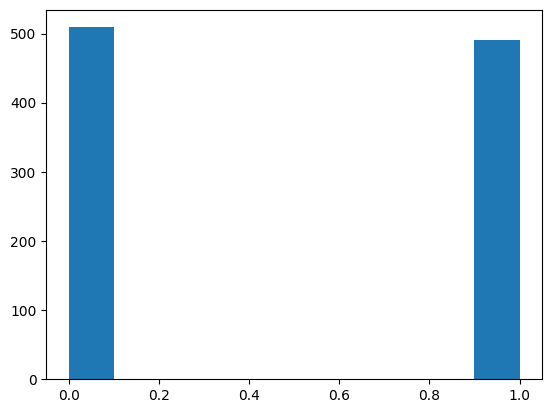

In [ ]:
n, p = 1, 0.5 # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000) # result of flipping a coin, tested 1000 times
plt.hist(s)

[Text(0.5, 0, 'Bernoulli'), Text(0, 0.5, 'Frequency')]

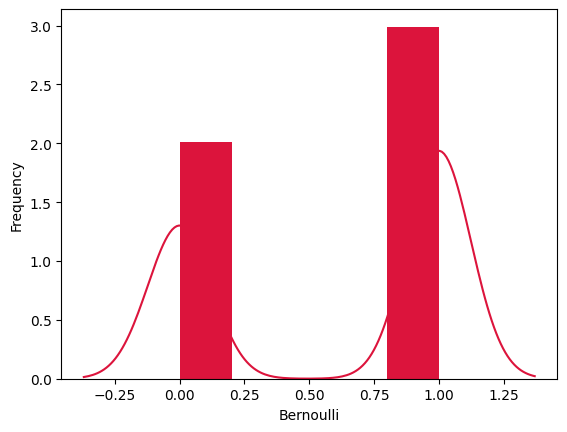

In [ ]:
from scipy.stats import bernoulli

b_data = bernoulli.rvs(size=1000, p =0.6) # ndarray or scalar: Random variates of given size
ax = sns.distplot(b_data, kde=True, color='crimson',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Bernoulli', ylabel='Frequency')

## Geometric distribution

In [ ]:
from scipy.stats import geom

<BarContainer object of 12 artists>

(1.0, 15.0)

Text(0.5, 0, 'n')

Text(0, 0.5, 'p(n)')

Text(0.5, 1.0, 'First Sucess at n')

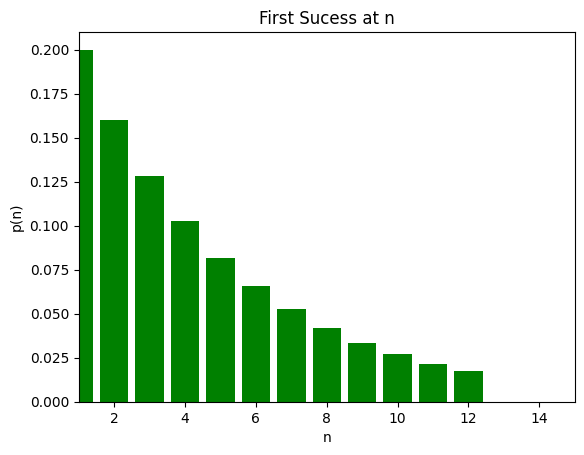

In [ ]:
prob = 0.2
n =12
p = np.zeros(n)
q = np.zeros(n)

for k in range(1, n+1):
    p[k-1] = (1-prob)**(k-1)*prob
    q[k-1] = geom.pmf(k, prob)

plt.bar(range(1,13), p, color='green')
plt.xlim(1, 15)
plt.xlabel('n'); plt.ylabel('p(n)')
plt.title('First Sucess at n')

## Hypergeometric distribution

In [ ]:
from scipy.stats import hypergeom

Suppose we have a collection of 1000 animals, of which 80 are dogs. Then if we want to know the probability of finding a given number of dogs if we choose at random 100 of the 1000 animals, we can initialize a frozen distribution and plot the probability mass function:

In [ ]:
[M, n, N] = [1000, 80, 100]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)

Text(0.5, 0, '# of dogs in our group of chosen animals')

Text(0, 0.5, 'hypergeom PMF')

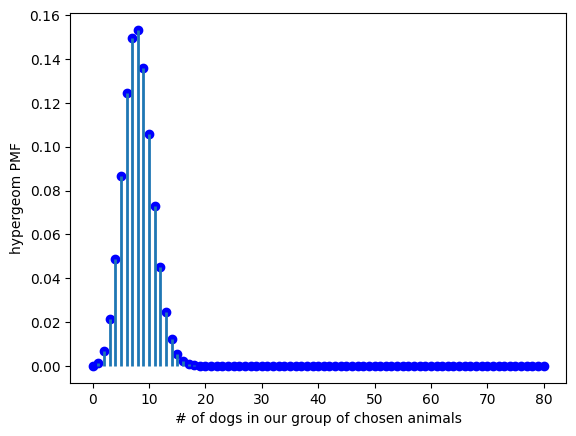

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'bo')
ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set_xlabel('# of dogs in our group of chosen animals')
ax.set_ylabel('hypergeom PMF')
plt.show()

## Poisson distribution

In [ ]:
from scipy.stats import poisson

[Text(0.5, 0, 'Poisson'), Text(0, 0.5, 'Frequency')]

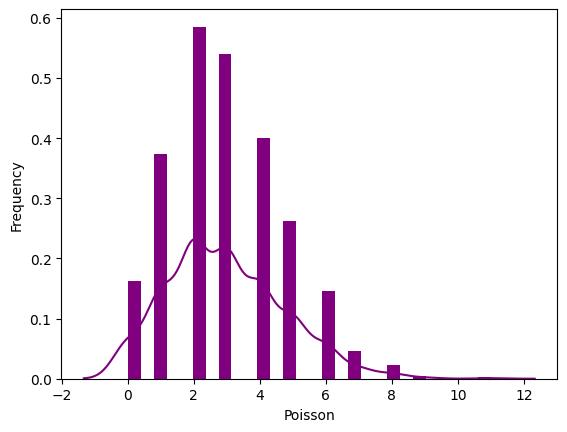

In [ ]:
p_data = poisson.rvs(mu=3, size=1000)
ax = sns.distplot(p_data, kde=True, color='purple',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')

## Binomial distribution

In [ ]:
from scipy.stats import binom

In [ ]:
binom.rvs

<bound method rv_discrete.rvs of <scipy.stats._discrete_distns.binom_gen object at 0x7a429fade890>>

In [ ]:
binom.rvs(n=100, p=0.5) # 100번을 trials 해서 성공확률(0.5)로 성공이 나올 trials
binom.rvs(n=100, p=0.5, size=10) # {100번을 trials 해서 성공확률(0.5)로 성공이 나올 trials}를 size 만큼 수행

45

array([51, 49, 58, 51, 46, 44, 54, 49, 53, 44])

[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Frequency')]

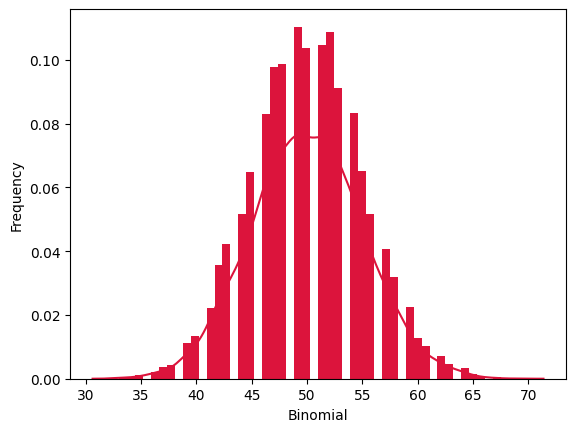

In [ ]:
b_data = binom.rvs(n=100, p=0.5, size=10000)
ax = sns.distplot(b_data, kde=True, color='crimson',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

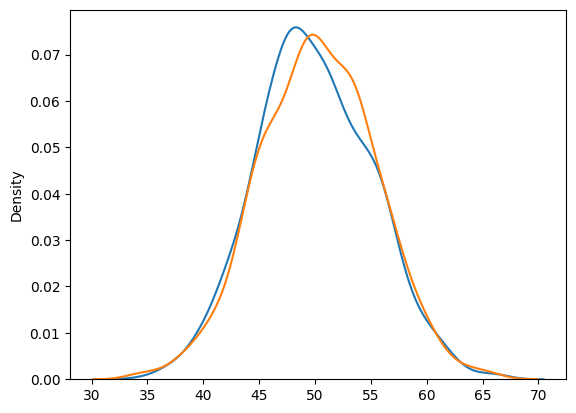

In [ ]:
sns.distplot(np.random.normal(loc=50, scale=5, size=1000), hist=False, label='normal') # loc=평균, scale=표준편차
sns.distplot(np.random.binomial(n=100, p=0.5, size=1000), hist=False, label='binomial')

## 이항분포와 포아송분포

[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Frequency')]

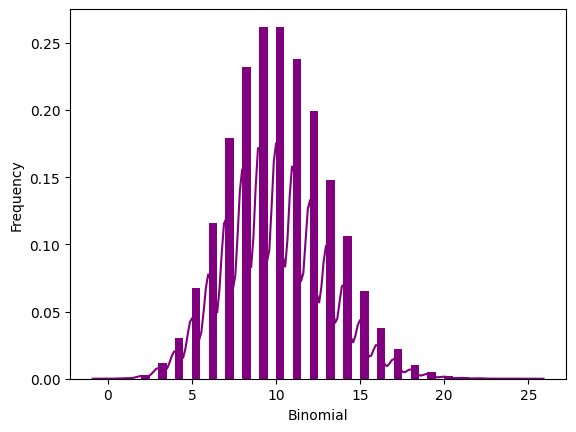

In [ ]:
b_data = binom.rvs(n=100, p=0.1, size=100000)
ax = sns.distplot(b_data, kde=True, color='purple',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

[Text(0.5, 0, 'Poisson'), Text(0, 0.5, 'Frequency')]

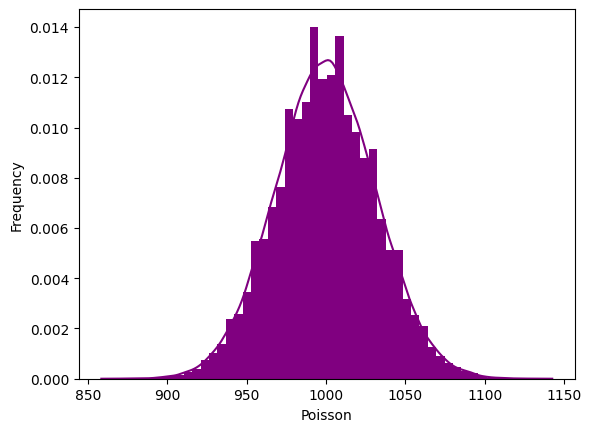

In [ ]:
np = 0.01*100000
p_data = poisson.rvs(mu=np, size=100000)
ax = sns.distplot(p_data, kde=True, color='purple',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')

## Normal distribution

In [ ]:
import numpy as np

[Text(0.5, 0, 'Normal'), Text(0, 0.5, 'Frequency')]

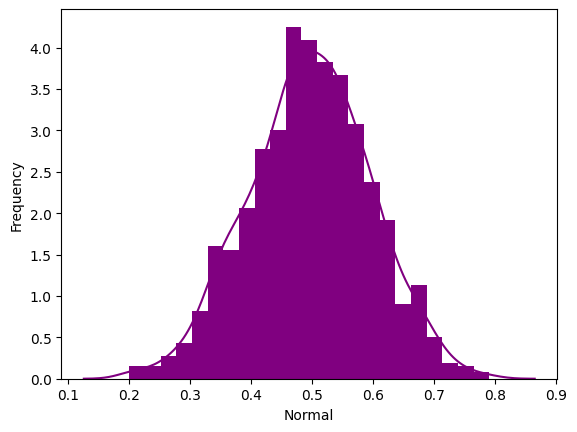

In [ ]:
mu, sigma = 0.5, 0.1
n_data = np.random.normal(mu,sigma, 1000)
ax = sns.distplot(n_data, kde=True, color='purple',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Normal', ylabel='Frequency')

In [ ]:
def ProbWinMatch(pmf):
    total = 0
    for p, prob in pmf.Items():
        total += prob * (1-p)**3
    return total

(array([0.16968212, 0.10180927, 0.33936424, 0.61085563, 1.25564769,
        1.79863048, 1.9683126 , 2.85065962, 3.59726095, 3.93662519,
        3.8008795 , 4.07237089, 3.02034174, 2.51129538, 1.52713908,
        1.08596557, 0.74660133, 0.33936424, 0.10180927, 0.10180927]),
 array([0.20044451, 0.22991138, 0.25937824, 0.28884511, 0.31831197,
        0.34777884, 0.3772457 , 0.40671256, 0.43617943, 0.46564629,
        0.49511316, 0.52458002, 0.55404689, 0.58351375, 0.61298061,
        0.64244748, 0.67191434, 0.70138121, 0.73084807, 0.76031493,
        0.7897818 ]),
 <BarContainer object of 20 artists>)

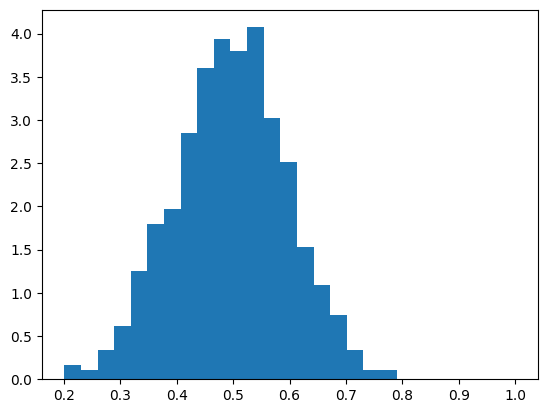

In [ ]:
plt.hist(n_data, 20, density=True) # y축을 normalize해줌
bins=1
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))* np.exp(-(bins-mu)**2/(2*sigma**2)),
         linewidth=3, color='y')

# <font color='red'> 2. Probability mass fuction

In [ ]:
np.random.randint(10)

7

In [ ]:
m = np.random.randint(2, 10, 40)
size = len(m)
m

array([6, 6, 8, 9, 6, 3, 6, 4, 8, 4, 7, 2, 5, 4, 3, 2, 5, 2, 9, 8, 4, 4,
       4, 6, 2, 4, 5, 8, 2, 5, 7, 9, 2, 6, 5, 3, 3, 2, 6, 4])

In [ ]:
import pandas as pd

<Axes: ylabel='0'>

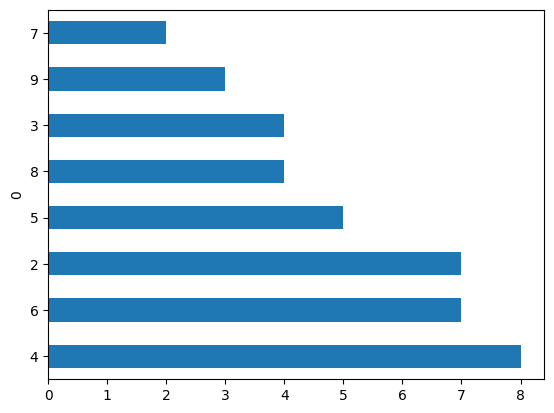

In [ ]:
df = pd.DataFrame(m)
df[0].value_counts().plot(kind='barh')

In [ ]:
data = pd.DataFrame(df[0].value_counts())
data

,count
0,
4,8
6,7
2,7
5,5
8,4
3,4
9,3
7,2


In [ ]:
data.columns = ['counts']
data

,counts
0,
4,8
6,7
2,7
5,5
8,4
3,4
9,3
7,2


In [ ]:
data['prob'] = data['counts']/size
data

,counts,prob
0,,
4,8,0.200
6,7,0.175
2,7,0.175
5,5,0.125
8,4,0.100
3,4,0.100
9,3,0.075
7,2,0.050


<BarContainer object of 8 artists>

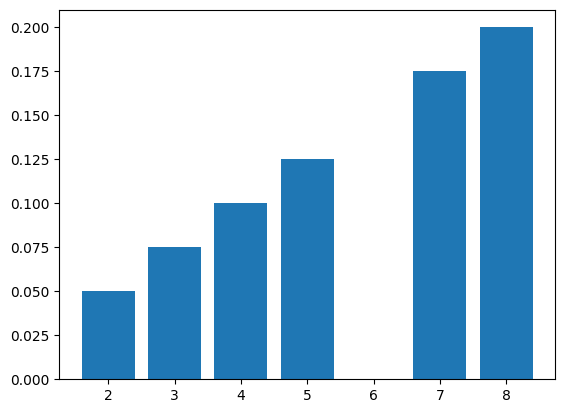

In [ ]:
plt.bar(data['counts'], data['prob']) # probability mass function

In [ ]:
tips =sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측치 비율' : (df.isnull().sum()/df.shape[0]).round(4)*100,
                       '고유값 수(nunique)' : df.nunique()})
    return tf

In [ ]:
summary(tips)

,데이터형태(dtypes),결측치 수(null),결측치 비율,고유값 수(nunique)
total_bill,float64,0,0.0,229
tip,float64,0,0.0,123
sex,category,0,0.0,2
smoker,category,0,0.0,2
day,category,0,0.0,4
time,category,0,0.0,2
size,int64,0,0.0,6


In [ ]:
data = tips[['day','tip', 'size']].groupby('day').tip.agg(['sum', 'count'])
data

,sum,count
day,,
Thur,171.83,62
Fri,51.96,19
Sat,260.40,87
Sun,247.39,76


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

,day,sum,count
0,Thur,171.83,62
1,Fri,51.96,19
2,Sat,260.40,87
3,Sun,247.39,76


In [ ]:
data['pmf'] = data['count']/data['count'].sum()
data['pmf'].sum()
data

np.float64(1.0)

,day,sum,count,pmf
0,Thur,171.83,62,0.254098
1,Fri,51.96,19,0.077869
2,Sat,260.40,87,0.356557
3,Sun,247.39,76,0.311475


# <font color='red'> 3. Probability density fuction

<Axes: ylabel='Density'>

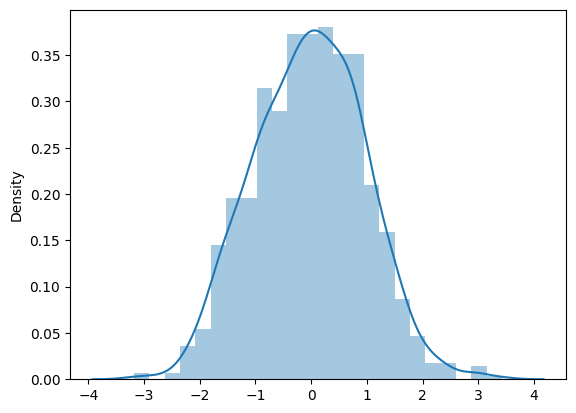

In [ ]:
data= np.random.normal(size=1000)
data = np.append(data, [1.5, 1.5, 1.5])
sns.distplot(data)

In [ ]:
mu = 20
sigma = 2
h = sorted(np.random.normal(mu, sigma, 1000))

(array([ 11.,  35.,  76., 186., 208., 219., 156.,  75.,  26.,   8.]),
 array([14.22465889, 15.39684156, 16.56902423, 17.74120689, 18.91338956,
        20.08557223, 21.25775489, 22.42993756, 23.60212023, 24.77430289,
        25.94648556]),
 <BarContainer object of 10 artists>)

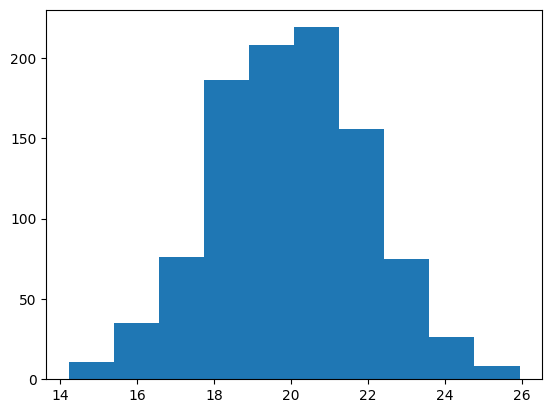

In [ ]:
plt.hist(np.random.normal(mu, sigma, 1000))

In [ ]:
mu = 24
sigma = 2
ah = sorted(np.random.normal(mu, sigma, 100))

(array([  3.,  18.,  68., 149., 196., 215., 198., 103.,  37.,  13.]),
 array([13.72848626, 14.93430774, 16.14012923, 17.34595071, 18.55177219,
        19.75759367, 20.96341515, 22.16923664, 23.37505812, 24.5808796 ,
        25.78670108]),
 <BarContainer object of 10 artists>)

(array([ 1.,  0.,  2.,  3., 11., 18., 33., 16., 13.,  3.]),
 array([15.93914519, 17.23116227, 18.52317935, 19.81519642, 21.1072135 ,
        22.39923058, 23.69124766, 24.98326474, 26.27528182, 27.5672989 ,
        28.85931597]),
 <BarContainer object of 10 artists>)

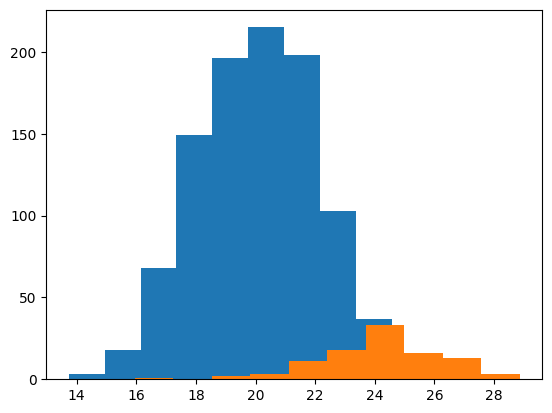

In [ ]:
plt.hist(h)
plt.hist(ah)

In [ ]:
import scipy.stats as stats

In [ ]:
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) # it is a fitting!

<Figure size 1000x300 with 0 Axes>

(array([0.00248793, 0.01492758, 0.05639309, 0.12356721, 0.16254479,
        0.17830168, 0.16420341, 0.08541895, 0.03068448, 0.01078103]),
 array([13.72848626, 14.93430774, 16.14012923, 17.34595071, 18.55177219,
        19.75759367, 20.96341515, 22.16923664, 23.37505812, 24.5808796 ,
        25.78670108]),
 <BarContainer object of 10 artists>)

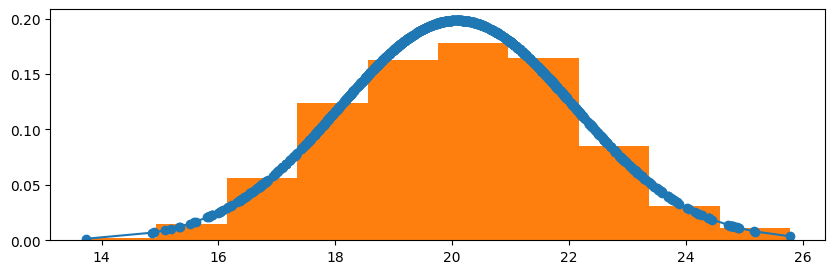

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(h, fit, '-o')
plt.hist(h, density=True)

# <font color='red'> 4. Cumulative distribution fuction

In [ ]:
import scipy.stats as stats

In [ ]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

pdf = stats.norm.pdf(x, mu, sigma) # the normal pdf
cdf = stats.norm.cdf(x, mu, sigma) # the normal cdf

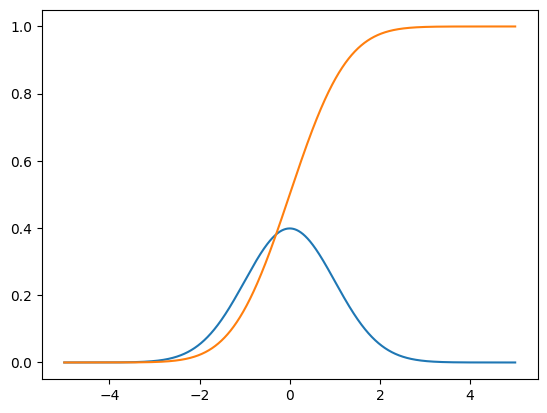

In [ ]:
plt.plot(x, pdf, label='pdf')
plt.plot(x, cdf, label='cdf')

In [ ]:
pdf.shape

(5000,)

(array([0.00248793, 0.01492758, 0.05639309, 0.12356721, 0.16254479,
        0.17830168, 0.16420341, 0.08541895, 0.03068448, 0.01078103]),
 array([13.72848626, 14.93430774, 16.14012923, 17.34595071, 18.55177219,
        19.75759367, 20.96341515, 22.16923664, 23.37505812, 24.5808796 ,
        25.78670108]),
 <BarContainer object of 10 artists>)

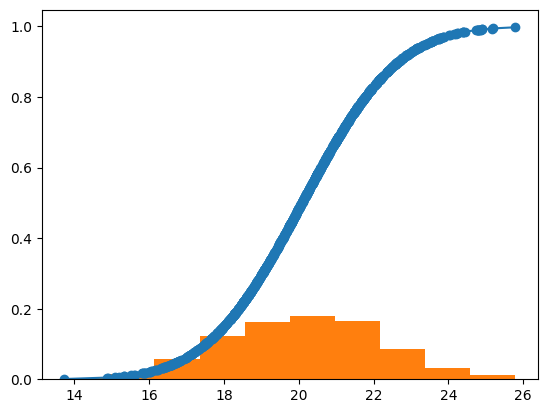

In [ ]:
fit = stats.norm.cdf(h, np.mean(h), np.std(h)) # it is a fitting!

plt.plot(h, fit, '-o')
plt.hist(h, density=True)

# End